# Experimentación con datos reales

In [1]:
# Imports
import subprocess
import pandas as pd # un clasicos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../data/"
NBA_SCORES = DATA_DIR + "nba_2016_scores.dat"
ATP_SCORES = DATA_DIR + "atp_matches_2015.dat"
NBA_TEAMS = DATA_DIR + "nba_2016_teams.csv"
ATP_NAMES = DATA_DIR + "atp_players.csv"
OUT = ".out"
BIN = "../src/tp"
TYPE_WP = "1"
TYPE_CMM = "0"

In [3]:
def run(data: str, typ: str):
    """Runs a program and returns the output"""
    print(f"running {BIN} with input file {data}, type {typ}")
    # in out type
    return subprocess.run([BIN, data, data+OUT, typ])

In [115]:
def read_mn(path: str):
    return pd.read_csv(
        path,
        sep=' ',
        skiprows=2, # la primera row contiene cant teams y cant partidos
        # Headers custom porque el formato de la catedra no lo tiene
        header=None,
        names=["date", "team1", "score1", "team2", "score2"],
    )

def read_ranking(path: str):
    return pd.read_csv(
        path,
        sep=' ',
        header=None,
        names=["rating"],
    )

def analyze_data(path: str) -> pd.DataFrame:
    df = read_mn(path)
    
    
    teams = {} # {team : { "percent": percent played, "total": total played, "played": set of teams}}
    
    for i, row in df.iterrows():
        date, team1, score1, team2, score2 = row
        if team1 not in teams: teams[team1] = {"total": 0, "opponents": set()}
        if team2 not in teams: teams[team2] = {"total": 0, "opponents": set()}


        teams[team1]["total"] += 1
        teams[team1]["opponents"].add(team2) # wont add if present
        
        teams[team2]["total"] += 1
        teams[team2]["opponents"].add(team1) # wont add if present
    
    total_teams = len(teams)
    
    max_games_played = -1
    for vals in teams.values():
        if vals["total"] > max_games_played:
            max_games_played = vals["total"]

    data = pd.DataFrame(columns=["team", "share", "total", "participation"])
    for i, team in enumerate(teams.keys()):
        # calculate %
        teams[team]["percent"] = len(teams[team]["opponents"]) / (total_teams - 1)
        teams[team]["participation"] = teams[team]["total"] / max_games_played
        
        # add to pandas dataframe
        data.loc[i] = [team, teams[team]["percent"], teams[team]["total"], teams[team]["participation"]]
    
    return data

## Levantar los datos

(0.0, 1.0)

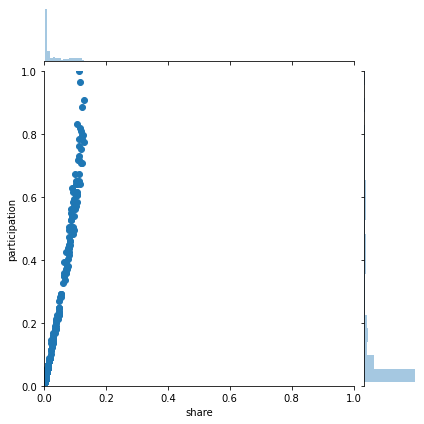

In [117]:
df_atp = analyze_data(ATP_SCORES)
#sns.scatterplot(df_nba["share"], df_nba["total"], size=)
#sns.distplot(df_atp["share"])

#plot = sns.jointplot(df_atp["share"], df_atp["total"])
plot = sns.jointplot(df_atp["share"], df_atp["participation"])
plot.ax_marg_x.set_xlim(0, 1)
plot.ax_marg_y.set_ylim(0, 1)

(0.0, 1.0)

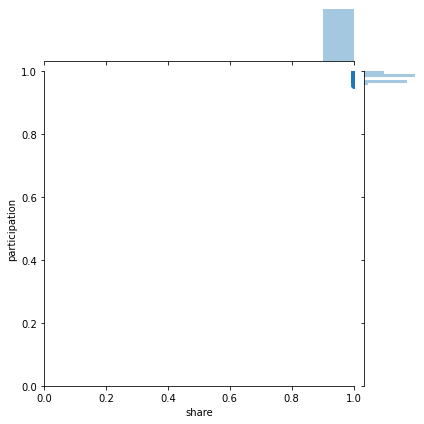

In [118]:
df_nba = analyze_data(NBA_SCORES)

plot = sns.jointplot(df_nba["share"], df_nba["participation"])
plot.ax_marg_x.set_xlim(0, 1)
plot.ax_marg_y.set_ylim(0, 1)

In [64]:
run(NBA_SCORES, TYPE_CMM)

running ../src/tp with input file ../data/nba_2016_scores.dat, type 0


CompletedProcess(args=['../src/tp', '../data/nba_2016_scores.dat', '../data/nba_2016_scores.dat.out', '0'], returncode=0)

In [55]:
ranking = read_ranking(NBA+OUT)
names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
names.head()

# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
ranking.sort_values("rating")

,rating,names
22,0.150813,Philadelphia
13,0.236722,LA_Lakers
2,0.290736,Brooklyn
23,0.298952,Phoenix
17,0.319984,Minnesota
18,0.384521,New_Orleans
25,0.412817,Sacramento
19,0.414393,New_York
7,0.420858,Denver
21,0.432244,Orlando


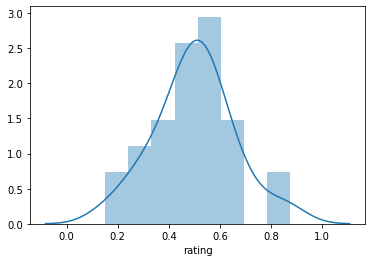

In [58]:
sns.distplot(ranking["rating"])

In [67]:
run(ATP_SCORES, TYPE_CMM)
# ranking = read_ranking(ATP+OUT)
# ranking

running ../src/tp with input file ../data/atp_matches_2015.dat, type 0


CompletedProcess(args=['../src/tp', '../data/atp_matches_2015.dat', '../data/atp_matches_2015.dat.out', '0'], returncode=-11)

In [ ]:
names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
names.head()

# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
ranking.sort_values("rating")